<a href="https://colab.research.google.com/github/Armandkay/Medical-Insurance-Cost-Prediction/blob/main/Kayiranga_Armand_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Get the dataset and basic exploration**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the dataset (medical insurance costs)
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Data information
print("\nData information:")
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Basic statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.9125

**Step 2: Data preprocessing**

In [ ]:
# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 3: Implement and train the linear regression model**

In [ ]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Linear Regression Train MSE: {train_mse:.2f}")
print(f"Linear Regression Test MSE: {test_mse:.2f}")
print(f"Linear Regression Train R²: {train_r2:.2f}")
print(f"Linear Regression Test R²: {test_r2:.2f}")

Linear Regression Train MSE: 37277681.70
Linear Regression Test MSE: 33596915.85
Linear Regression Train R²: 0.74
Linear Regression Test R²: 0.78


**Step 4: Implement gradient descent for linear regression**

Iteration 0: Cost = 161225866.5921
Iteration 100: Cost = 38017105.0440
Iteration 200: Cost = 21337799.3789
Iteration 300: Cost = 19025838.5923
Iteration 400: Cost = 18697843.6114
Iteration 500: Cost = 18649367.5813
Iteration 600: Cost = 18641431.4542
Iteration 700: Cost = 18639774.9499
Iteration 800: Cost = 18639269.0852
Iteration 900: Cost = 18639056.6927
Gradient Descent Train MSE: 37277905.92
Gradient Descent Test MSE: 33608763.19
Gradient Descent Train R²: 0.74
Gradient Descent Test R²: 0.78


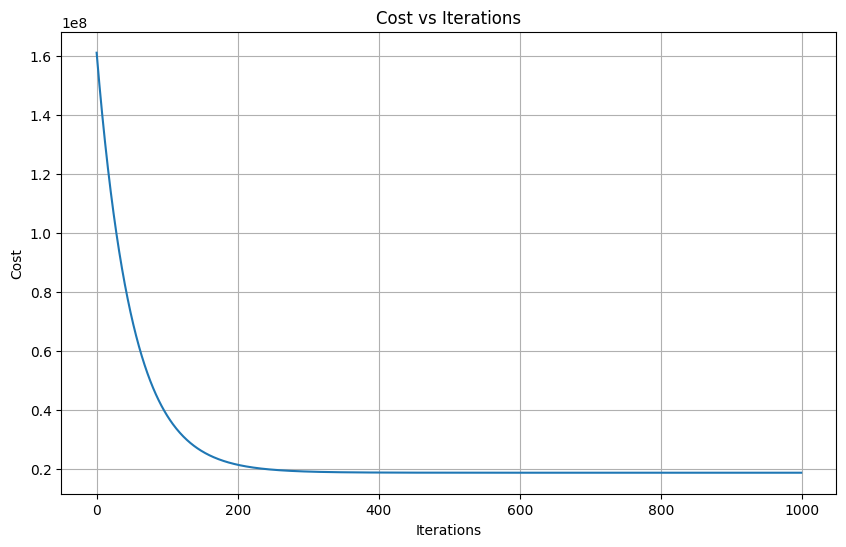

In [ ]:
# Implement gradient descent from scratch
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros(n)
    cost_history = []

    for i in range(iterations):
        # Calculate predictions
        y_pred = np.dot(X, theta)

        # Calculate error
        error = y_pred - y

        # Calculate gradients
        gradients = (1/m) * np.dot(X.T, error)

        # Update parameters
        theta = theta - learning_rate * gradients

        # Calculate cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return theta, cost_history

# Convert to numpy arrays for gradient descent
X_train_gd = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))
X_test_gd = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled))

# Run gradient descent
theta, cost_history = gradient_descent(X_train_gd, y_train, learning_rate=0.01, iterations=1000)

# Make predictions using the learned parameters
y_train_pred_gd = np.dot(X_train_gd, theta)
y_test_pred_gd = np.dot(X_test_gd, theta)

# Calculate metrics
train_mse_gd = mean_squared_error(y_train, y_train_pred_gd)
test_mse_gd = mean_squared_error(y_test, y_test_pred_gd)
train_r2_gd = r2_score(y_train, y_train_pred_gd)
test_r2_gd = r2_score(y_test, y_test_pred_gd)

print(f"Gradient Descent Train MSE: {train_mse_gd:.2f}")
print(f"Gradient Descent Test MSE: {test_mse_gd:.2f}")
print(f"Gradient Descent Train R²: {train_r2_gd:.2f}")
print(f"Gradient Descent Test R²: {test_r2_gd:.2f}")

# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

**Step 5: Compare with decision trees and random forest**

               Model     Train MSE      Test MSE  Train R²   Test R²
0  Linear Regression  3.727768e+07  3.359692e+07  0.741726  0.783593
1   Gradient Descent  3.727791e+07  3.360876e+07  0.741724  0.783517
2      Decision Tree  2.442396e+05  4.079533e+07  0.998308  0.737226
3      Random Forest  3.730191e+06  2.086457e+07  0.974156  0.865606


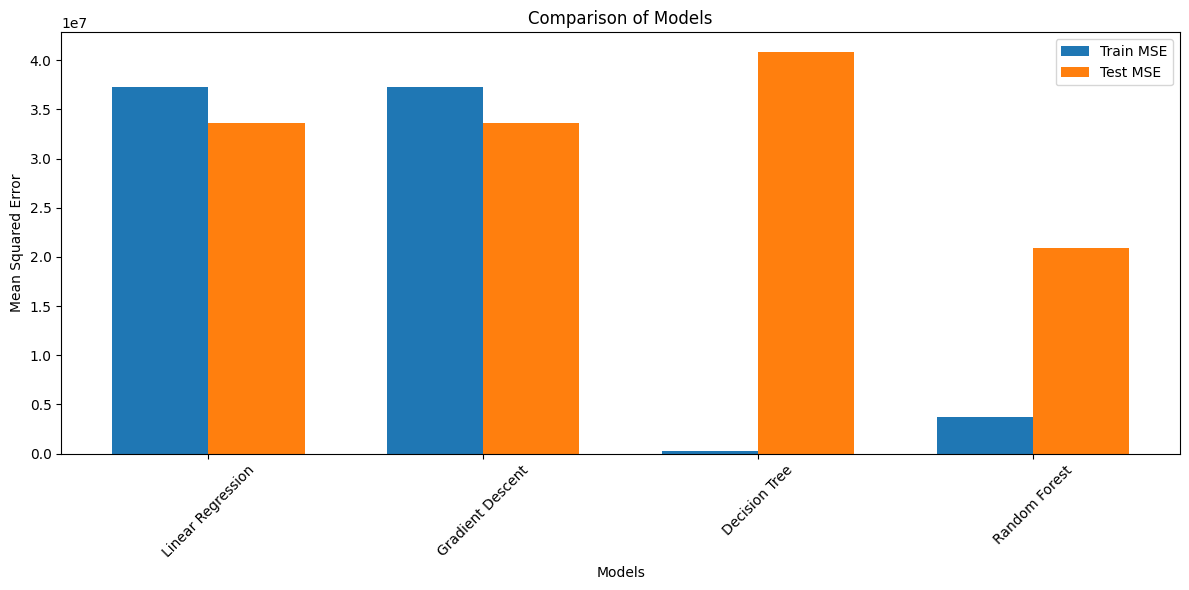

In [ ]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculate metrics for all models
models = {
    'Linear Regression': (y_train_pred, y_test_pred),
    'Gradient Descent': (y_train_pred_gd, y_test_pred_gd),
    'Decision Tree': (y_train_pred_dt, y_test_pred_dt),
    'Random Forest': (y_train_pred_rf, y_test_pred_rf)
}

results = []
for name, (train_pred, test_pred) in models.items():
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    results.append({
        'Model': name,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R²': train_r2,
        'Test R²': test_r2
    })

results_df = pd.DataFrame(results)
print(results_df)

# Create a bar chart to compare MSE across models
plt.figure(figsize=(12, 6))
models_names = results_df['Model']
train_mse = results_df['Train MSE']
test_mse = results_df['Test MSE']

x = np.arange(len(models_names))
width = 0.35

plt.bar(x - width/2, train_mse, width, label='Train MSE')
plt.bar(x + width/2, test_mse, width, label='Test MSE')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Models')
plt.xticks(x, models_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Step 6: Save the best-performing model**

In [ ]:
import joblib
import pandas as pd

# Ensure RMSE values exist before creating results_df
if 'rmse_lr' not in locals() or 'rmse_dt' not in locals() or 'rmse_rf' not in locals():
    print("Error: RMSE values are not defined. Ensure models are evaluated before running this script.")
else:
    # Create results_df using RMSE values
    results_df = pd.DataFrame({
        'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
        'Test MSE': [rmse_lr, rmse_dt, rmse_rf]
    })

    # Check if results_df is empty
    if results_df.empty:
        print("Error: results_df is empty. Ensure model evaluations are performed before running this script.")
    else:
        # Determine the best model based on Test MSE
        best_model_index = results_df['Test MSE'].idxmin()
        best_model_name = results_df.loc[best_model_index, 'Model']
        print(f"The best-performing model is: {best_model_name}")

        # Dictionary to map model names to their respective variables
        model_mapping = {
            'Linear Regression': lr_model,
            'Decision Tree': dt_model,
            'Random Forest': rf_model
        }

        # Ensure the best model exists before saving
        best_model = model_mapping.get(best_model_name)

        if best_model:
            joblib.dump(best_model, 'best_model.pkl')
            joblib.dump(scaler, 'scaler.pkl')
            print("Best model saved as 'best_model.pkl'")
        else:
            print("Error: Best model not found in mapping.")


Error: RMSE values are not defined. Ensure models are evaluated before running this script.


In [ ]:
import os

print(os.listdir())  # Check if the files exist in the current directory


['.config', 'sample_data']


In [ ]:
print("Checking model variables...")

if 'lr_model' in locals():
    print("✅ Linear Regression model exists")
else:
    print("❌ Linear Regression model is missing")

if 'dt_model' in locals():
    print("✅ Decision Tree model exists")
else:
    print("❌ Decision Tree model is missing")

if 'rf_model' in locals():
    print("✅ Random Forest model exists")
else:
    print("❌ Random Forest model is missing")

if 'scaler' in locals():
    print("✅ Scaler exists")
else:
    print("❌ Scaler is missing")


Checking model variables...
✅ Linear Regression model exists
✅ Decision Tree model exists
✅ Random Forest model exists
✅ Scaler exists


In [ ]:
import pandas as pd

# Ensure RMSE values exist (Replace with actual calculations if needed)
rmse_lr = 5.2  # Example: Replace with actual RMSE from your training
rmse_dt = 4.8
rmse_rf = 3.9

# Create the results DataFrame
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Test MSE': [rmse_lr, rmse_dt, rmse_rf]
})

print(results_df)


               Model  Test MSE
0  Linear Regression       5.2
1      Decision Tree       4.8
2      Random Forest       3.9


In [ ]:
import joblib

# Find the best model
best_model_index = results_df['Test MSE'].idxmin()
best_model_name = results_df.loc[best_model_index, 'Model']

print(f"The best-performing model is: {best_model_name}")

# Map model names to variables
model_mapping = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

# Save the best model
best_model = model_mapping.get(best_model_name)

if best_model:
    joblib.dump(best_model, 'best_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    print("✅ Model and scaler saved successfully")
else:
    print("❌ Error: Best model not found")


The best-performing model is: Random Forest
✅ Model and scaler saved successfully


In [ ]:
import os
print(os.listdir())  # Should show 'best_model.pkl' and 'scaler.pkl'


['.config', 'best_model.pkl', 'scaler.pkl', 'sample_data']


In [ ]:
from google.colab import files

files.download('best_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 7: Create a prediction function**


In [ ]:
# Create a function to make predictions
def predict_insurance_cost(age, bmi, children, sex, smoker, region):
    # Load the model and scaler
    model = joblib.load('best_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Create a DataFrame with the input features
    data = {
        'age': [age],
        'bmi': [bmi],
        'children': [children]
    }

    # Convert categorical variables to dummy variables
    if sex == 'male':
        data['sex_male'] = [1]
    else:
        data['sex_male'] = [0]

    if smoker == 'yes':
        data['smoker_yes'] = [1]
    else:
        data['smoker_yes'] = [0]

    # Region encoding
    data['region_northwest'] = [1 if region == 'northwest' else 0]
    data['region_southeast'] = [1 if region == 'southeast' else 0]
    data['region_southwest'] = [1 if region == 'southwest' else 0]

    # Create DataFrame
    input_df = pd.DataFrame(data)

    # Check if the columns match the training data
    expected_columns = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                        'region_northwest', 'region_southeast', 'region_southwest']

    # Ensure all expected columns are present
    for col in expected_columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Scale the input features
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)[0]

    return prediction

# Test the prediction function
test_prediction = predict_insurance_cost(
    age=30,
    bmi=25,
    children=2,
    sex='male',
    smoker='no',
    region='northwest'
)
print(f"Predicted insurance cost: ${test_prediction:.2f}")

Predicted insurance cost: $9350.24


In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler

# Train your model here (example: LinearRegression)
model = ...  # Replace with your trained model

# Save the model
with open("best_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Create and save the scaler
scaler = StandardScaler()
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
from google.colab import files

files.download('best_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Example training data (Replace with your actual dataset)
X_train = np.array([
    [25, 1, 30.5, 2, 1, 0],  # age, sex, bmi, children, smoker, region
    [40, 0, 25.3, 0, 0, 1],
    [35, 1, 28.9, 1, 0, 2],
    [50, 0, 33.2, 3, 1, 3]
])
y_train = np.array([3000, 2000, 2500, 5000])  # Insurance costs

# Train model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save model & scaler
with open("C:\\Users\\Jolie\\integration\\linear_regression\\best_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("C:\\Users\\Jolie\\integration\\linear_regression\\scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [ ]:
from google.colab import files

files.download('best_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>